In [ ]:
import random
import numpy as np
#data = np.random.rand(100,2)
data_x = np.random.uniform(0,100,100)
data_y = np.random.uniform(0,100,100)
data = np.concatenate((data_x,data_y))
data = data.reshape(100,-1)
data

array([[93.10825955,  4.42640094],
       [ 6.30988612, 99.05753534],
       [27.75365918, 96.53116241],
       [49.19627925, 15.58650213],
       [12.47705717, 31.24137866],
       [63.93215941, 57.28849152],
       [14.62329162, 14.49896674],
       [68.64028536, 49.81453749],
       [49.29336606, 64.77983564],
       [94.36935291, 88.85259988],
       [26.95647043, 27.38312809],
       [43.38217797, 61.72370209],
       [29.56211831, 94.54653134],
       [90.53711462, 38.40462709],
       [88.27333811, 40.47776395],
       [95.9834259 , 28.87735032],
       [35.88943458, 23.70342366],
       [67.30058645, 74.78394463],
       [91.39935843,  0.32115242],
       [15.74566182,  5.12246936],
       [29.46609343, 14.61353796],
       [16.25895432, 81.93675115],
       [38.64727409, 99.42021923],
       [44.5412283 , 84.89166082],
       [63.54845977, 58.48467834],
       [24.09511295, 96.91186233],
       [23.79547555, 15.91839927],
       [68.12090645, 32.57065204],
       [48.7736016 ,

In [ ]:
def distortion(clusters, centroids):
    errors = []
    
    for i, cluster in enumerate(clusters):
        error = 0
        
        for data_sample in cluster:
            error = error + np.linalg.norm(data_sample-centroids[i])
            
            #error for each cluster is sum of square distances between all data samples in the cluster and centroid
            
        errors.append(error)
        
    return np.array(errors)

In [25]:
def k_means(X, K):
    # Initialize centroids randomly
    centroids = X[random.sample(range(len(X)), K)]
    errors = []
    i = 0
    while True:


        # Assign each data point to the closest centroid
        clusters = [[] for _ in range(K)]
        for x in X:
            distances = [np.linalg.norm(x - c) for c in centroids]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(x)

        # Update centroids based on the mean of the assigned data points
        for j in range(K):
            centroids[j] = np.mean(clusters[j], axis=0)
        
        #print(distortion(clusters, centroids))
        errors.append(sum(distortion(clusters, centroids)))
        #print(errors)
        if i > 0 and abs(errors[i] - errors[i-1]) < 0.001:
            break
        i = i+1
        #print(i)

    return clusters, centroids, errors[-1]

In [23]:
clusters, centroids, errors = k_means(data,5)

1
2
3
4
5
6


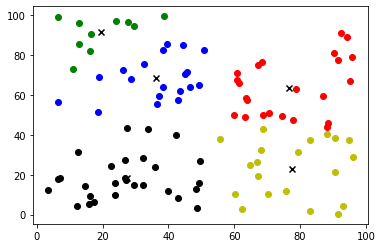

In [21]:
import matplotlib.pyplot as plt
# Plot results
colors = ['r', 'g', 'b', 'y','k']
for i, cluster in enumerate(clusters):
    for x in cluster:
        plt.scatter(x[0], x[1], color=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], color='k', marker='x')
plt.show()

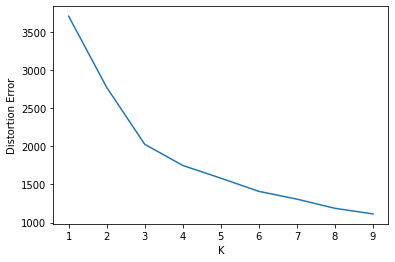

In [26]:
#Running kmeans function multiple times to know best value of 'K'
distortions_per_k = []
for k in range(1, 10):
    distortions = []
    for i in range(20):
        clusters, centroids, min_distortion = k_means(data, k)
        distortions.append(min_distortion) #Record minimum distortion for each iteration
    distortions_per_k.append(min(distortions)) #Record minimum distortion for each value of k
#Plotting the result
plt.plot(range(1, 10), distortions_per_k)
plt.xlabel('K')
plt.ylabel('Distortion Error')
plt.show()